# Synthetic kimberlitic model

This notebook creates a model simulating a kimberlite with magnetization using the poligonal prisms from fatiando and save its parameters in an outer file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle

from fatiando import utils
from fatiando.gridder import regular
from fatiando.vis import myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img

/home/vital/anaconda2/lib/python2.7/site-packages/fatiando/vis/myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


### Auxiliary functions

In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

/home/vital/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Creating the model

In [3]:
kimberlite_model = dict()

In [4]:
# model parameters
kimberlite_model['M'] = 20 # number of vertices per prism
kimberlite_model['L'] = 8 # number of prisms
kimberlite_model['P'] = kimberlite_model['L']*(kimberlite_model['M']+2) # number of parameters

kimberlite_model['z0'] = 50.    # depth of the top the shallowest prism
kimberlite_model['dz'] = 100.    # thickness of each prism

kimberlite_model['inc'] = -12.  # inclination
kimberlite_model['dec'] = -48.   # declination
kimberlite_model['intensity'] = 1. # intensity

kimberlite_model['props']={'magnetization': utils.ang2vec(
    kimberlite_model['intensity'], kimberlite_model['inc'], kimberlite_model['dec'])} # physical property: magnetization

#ri = np.linspace(1000., 200., kimberlite_model['M']*kimberlite_model['L']) # radial distance for each vertice
#rand = np.random.uniform(0.8, 1., kimberlite_model['M']*kimberlite_model['L'])
#r = ri*rand

r = np.zeros(kimberlite_model['M']) + 40.

# Cartesian coordinates of the origin of each prism
x0 = np.zeros(kimberlite_model['L']) 
y0 = np.zeros(kimberlite_model['L'])

l = []   # list of parameters of the prisms

#for i in range(kimberlite_model['L']):
#    l.append([r[kimberlite_model['M']*i:kimberlite_model['M']*(i+1)], x0[i]+100., y0[i]+100.,
#              kimberlite_model['z0'] + kimberlite_model['dz']*i,
#              kimberlite_model['z0'] + kimberlite_model['dz']*(i + 1), kimberlite_model['props']])

for i in range(kimberlite_model['L']):
    l.append([r*(10.-1.*i), x0[i], y0[i], kimberlite_model['z0'] + kimberlite_model['dz']*i,\
          kimberlite_model['z0'] + kimberlite_model['dz']*(i + 1), kimberlite_model['props']])

kimberlite_model['prisms'] = mfun.pol2cart(l, kimberlite_model['M'], kimberlite_model['L'])
kimberlite_model['param_vec'] = mfun.param_vec(l, kimberlite_model['M'], kimberlite_model['L'])

### Model ploting

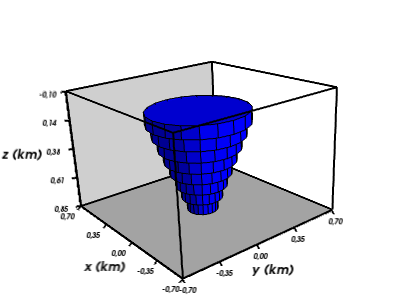

In [5]:
bounds = [-700., 700., -700., 700., -100., 850.]

red, green, blue = (1, 0, 0), (0, 1, 0), (0, 0, 1)
white, black = (1, 1, 1), (0, 0, 0),

# Show the model
scene = myv.figure()
myv.polyprisms(kimberlite_model['prisms'], 'magnetization', opacity=1., color=blue)

ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.65
scene.scene.camera.position = [-0.089204656936016313, -0.066107174155361687, -0.04083578885723696]
scene.scene.camera.focal_point = [1.1820671636724554e-16, 1.3134079596360617e-17, -1.9701119394540926e-17]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.24683390337942718, 0.24593292331329802, -0.93733132955911114]
scene.scene.camera.clipping_range = [0.057117737884348194, 0.1956040854922288]
scene.scene.camera.compute_view_plane_normal()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)

myv.savefig('../../synthetic_data/kimberlite/kimberlite_true.png')
myv.show()
img(filename='../../synthetic_data/kimberlite/kimberlite_true.png')

### Saving in an outer file

In [6]:
file_name = '../../synthetic_data/kimberlite/kimberlite_model.pickle'
with open(file_name, 'w') as f:
    pickle.dump(kimberlite_model, f)